<a href="https://colab.research.google.com/github/seyeonjungGit/P_Project_YOUTUBE_Analysis/blob/main/Youtube_Analysis(Q2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 설치 & 기본설정

matplotlib 폰트 설치
- 설치 후 런타임 재시작

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
# 설정 변환을 위해서 matplotlib만 import
import matplotlib as mpl
import warnings

# Windows
mpl.rc("font", family='NanumBarunGothic')

# 폰트변경 후 마이너스 사인 수정
mpl.rc('axes', unicode_minus=False)

# 화질설정
%config InlineBackend.figure_format='retina'

warnings.filterwarnings("ignore")
%matplotlib inline

프로파일링 설치

In [ ]:
# pip install -U pandas-profiling

In [ ]:
# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

# 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df_origin = pd.read_csv('/content/drive/MyDrive/preon_nlp/기업과제자료/pretest_data.csv')
df_origin.head(3)

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
0,V-0db,CH49ta0,2021-07-01,Entertainment,PT8M20S,SiriusXM|Sirius XM|Sirius|SXM|BIGHIT|빅히트|방탄소년단...,BTS performs their hit songs ‘Dynamite’ and ‘B...,2021-07-03,2021-07-04,13,...,792,1014,10373,10720,1080000,1080000,685992413,687485021,5947,5950
1,V-1XL,CHZVD--,2021-06-24,Entertainment,PT9M17S,치킨불냉면|치킨|불냉면|냉면,영상에 나오는 캐릭터의 이름은 파도비 입니다. 고양이가 아니라 파란 도깨비입니다. ...,2021-06-26,2021-06-27,28,...,121,154,1083,1173,627000,628000,75327083,75685030,70,70
2,V-4fa,CH9w-h_,2021-07-17,Entertainment,PT7M39S,NaN,"거세 구형, 성 충동 제거를 위한 엄벌 치료 VS 인권 보호해야고민 끝에 내린 강요...",2021-07-19,2021-07-22,1,...,162,233,696,1006,5750000,5750000,5424167911,5431617741,34270,34341


In [ ]:
df_origin.shape

(2644, 25)

In [ ]:
df_origin.duplicated().sum()

0

중복데이터는 없음

In [ ]:
df_origin.isnull().sum()

video_id                      0
channel_id                    0
published_date                0
category_name                 0
duration                      0
tags                        370
description                  40
on_trending_date              0
off_trending_date             0
on_rank                       0
off_rank                      0
on_views                      0
off_views                     0
on_likes                      0
off_likes                     0
on_dislikes                   0
off_dislikes                  0
on_comments                   0
off_comments                  0
on_channel_subscribers        0
off_channel_subscribers       0
on_channel_total_views        0
off_channel_total_views       0
on_channel_total_videos       0
off_channel_total_videos      0
dtype: int64

결측치는 tags와 description에 분포

- tags                        370
- description                  40

In [ ]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   video_id                  2644 non-null   object
 1   channel_id                2644 non-null   object
 2   published_date            2644 non-null   object
 3   category_name             2644 non-null   object
 4   duration                  2644 non-null   object
 5   tags                      2274 non-null   object
 6   description               2604 non-null   object
 7   on_trending_date          2644 non-null   object
 8   off_trending_date         2644 non-null   object
 9   on_rank                   2644 non-null   int64 
 10  off_rank                  2644 non-null   int64 
 11  on_views                  2644 non-null   int64 
 12  off_views                 2644 non-null   int64 
 13  on_likes                  2644 non-null   int64 
 14  off_likes               

2644row와 25columns, object와 int 형이 있음.

## 판다스 프로파일링

In [ ]:
# from pandas_profiling import ProfileReport
# profile=df.profile_report() 
# profile.to_file('./Youtube_report1.html') 

## 전처리(형변환)

In [ ]:
df_origin.columns

Index(['video_id', 'channel_id', 'published_date', 'category_name', 'duration',
       'tags', 'description', 'on_trending_date', 'off_trending_date',
       'on_rank', 'off_rank', 'on_views', 'off_views', 'on_likes', 'off_likes',
       'on_dislikes', 'off_dislikes', 'on_comments', 'off_comments',
       'on_channel_subscribers', 'off_channel_subscribers',
       'on_channel_total_views', 'off_channel_total_views',
       'on_channel_total_videos', 'off_channel_total_videos'],
      dtype='object')

In [ ]:
import copy

# 원본 보존(dataframe은 mutable한 객체이므로 복제를 위해 deepcopy(깊은복사) 이용)
df = copy.deepcopy(df_origin)

In [ ]:
from datetime import date

# 이후 편의를 위해 날짜형 데이터로 형변환
df['published_date'] = pd.to_datetime(df['published_date'])
df['on_trending_date'] = pd.to_datetime(df['on_trending_date'])
df['off_trending_date'] = pd.to_datetime(df['off_trending_date'])

In [ ]:
# 형변환 확인
df.dtypes

video_id                            object
channel_id                          object
published_date              datetime64[ns]
category_name                       object
duration                            object
tags                                object
description                         object
on_trending_date            datetime64[ns]
off_trending_date           datetime64[ns]
on_rank                              int64
off_rank                             int64
on_views                             int64
off_views                            int64
on_likes                             int64
off_likes                            int64
on_dislikes                          int64
off_dislikes                         int64
on_comments                          int64
off_comments                         int64
on_channel_subscribers               int64
off_channel_subscribers              int64
on_channel_total_views               int64
off_channel_total_views              int64
on_channel_

## summary statistics

In [ ]:
# Numeric data에 대한 통계 확인 (datetime형 포함)
df.describe(datetime_is_numeric=True)

,published_date,on_trending_date,off_trending_date,on_rank,off_rank,on_views,off_views,on_likes,off_likes,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
count,2644,2644,2644,2644.000000,2644.000000,2.644000e+03,2.644000e+03,2.644000e+03,2.644000e+03,2644.000000,2644.000000,2.644000e+03,2.644000e+03,2.644000e+03,2.644000e+03,2.644000e+03,2.644000e+03,2644.000000,2644.000000
mean,2021-05-27 14:13:58.729198336,2021-05-29 15:45:28.593040896,2021-05-30 23:40:23.600605184,20.234493,35.795386,9.534819e+05,1.432732e+06,5.465813e+04,6.845384e+04,534.279879,860.402421,9.032085e+03,1.111202e+04,1.742059e+06,1.748095e+06,8.639525e+08,8.665469e+08,9276.285174,9229.746596
min,2021-03-25 00:00:00,2021-03-27 00:00:00,2021-04-01 00:00:00,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.531600e+04,5.531600e+04,1.000000,1.000000
25%,2021-04-27 00:00:00,2021-04-29 00:00:00,2021-04-30 00:00:00,9.000000,28.000000,2.353520e+05,3.068540e+05,4.208500e+03,4.932750e+03,86.000000,108.000000,5.110000e+02,5.977500e+02,1.480000e+05,1.507500e+05,3.698228e+07,3.780661e+07,118.000000,118.000000
50%,2021-05-28 00:00:00,2021-05-30 00:00:00,2021-05-31 00:00:00,19.000000,37.000000,4.279245e+05,5.715080e+05,7.851000e+03,9.507000e+03,159.000000,211.000000,1.157000e+03,1.311500e+03,4.670000e+05,4.695000e+05,1.215355e+08,1.223838e+08,326.500000,327.500000
75%,2021-06-27 00:00:00,2021-06-29 00:00:00,2021-07-01 00:00:00,30.000000,45.000000,8.268800e+05,1.119499e+06,1.688350e+04,2.085950e+04,315.000000,435.000000,2.720000e+03,3.150750e+03,1.272500e+06,1.282500e+06,4.857386e+08,4.878799e+08,1245.250000,1244.500000
max,2021-07-29 00:00:00,2021-07-31 00:00:00,2021-07-31 00:00:00,50.000000,50.000000,9.727667e+07,2.488763e+08,8.097173e+06,1.575992e+07,37349.000000,133721.000000,4.625133e+06,6.659938e+06,5.890000e+07,5.940000e+07,2.170125e+10,2.170568e+10,545577.000000,545764.000000
std,NaN,NaN,NaN,12.833115,10.376753,3.200375e+06,6.836354e+06,3.239337e+05,4.983217e+05,2070.643487,4754.238395,1.155321e+05,1.574601e+05,5.546694e+06,5.569829e+06,2.511740e+09,2.518026e+09,43156.370481,43100.803783


3월월 말부터 7월말까지의 데이터이며,

1위부터 50위까지의 인기동영상 데이터입니다.

In [ ]:
# categorical data에 대한 통계 -> 관측값 개수와 유일값개수, 최빈값, 최빈값의 빈도수.
df.describe(include=[object])  

,video_id,channel_id,category_name,duration,tags,description
count,2644,2644,2644,2644,2274,2604
unique,2643,940,15,1200,1978,2492
top,VBSBm,CHQ2O-i,Entertainment,PT8M1S,파뿌리|예능|게임|GAME|오락|버라이어티|variety|웹예능|플레이,Connect with BTS: https://ibighit.com/bts http...
freq,2,17,954,17,14,10


# Q2.새로운 지표의 개발
각각의 비디오는 시청자의 호응도(engagement)를 판단할수 있는 객관적인 지표들이
있음
- ex) views, likes, dislikes, comments,...
    - 비디오를 인기 동영상 기준에 부합하도록 분류할수 있는 새로운 지표를 개발하고
    - 이 지표를 사용하여 engagement 와 어떤 상관관계가 있는지 설명하시오.

## 문제해석1) 해당 비디오가 '인기'비디오가 될 것인지 판별하기 위한 지표

In [ ]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})

In [ ]:
df.head()

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
0,V-0db,CH49ta0,2021-07-01,Entertainment,PT8M20S,SiriusXM|Sirius XM|Sirius|SXM|BIGHIT|빅히트|방탄소년단...,BTS performs their hit songs ‘Dynamite’ and ‘B...,2021-07-03,2021-07-04,13,...,792,1014,10373,10720,1080000,1080000,685992413,687485021,5947,5950
1,V-1XL,CHZVD--,2021-06-24,Entertainment,PT9M17S,치킨불냉면|치킨|불냉면|냉면,영상에 나오는 캐릭터의 이름은 파도비 입니다. 고양이가 아니라 파란 도깨비입니다. ...,2021-06-26,2021-06-27,28,...,121,154,1083,1173,627000,628000,75327083,75685030,70,70
2,V-4fa,CH9w-h_,2021-07-17,Entertainment,PT7M39S,NaN,"거세 구형, 성 충동 제거를 위한 엄벌 치료 VS 인권 보호해야고민 끝에 내린 강요...",2021-07-19,2021-07-22,1,...,162,233,696,1006,5750000,5750000,5424167911,5431617741,34270,34341
3,V-5ip,CHUQVGX,2021-06-02,Sports,PT6M40S,News Network|SBS SPORTSMUG|SPORTSMUG|스포츠머그|축구|...,세계 최초 9회 연속 올림픽 본선 진출! 그동안 한국 축구의 역사를 써내려 간 올림...,2021-06-04,2021-06-04,18,...,30,30,416,416,94200,94200,71160125,71160125,224,224
4,V-5jn,CHhI3EX,2021-07-06,Sports,PT11M27S,이천수|심판도전기|축구심판,찾아 뵐 심판분들이 이제 18명정도 남았네요,2021-07-08,2021-07-09,11,...,112,143,687,772,47600,49200,6993451,7607123,21,21


# 인기비디오 선정 채널들의 월평균 비디오 제작수가 많을수록 인게이지먼트와의 상관관계가 높을 것이다.(카테고리별 분석)

In [ ]:
df_in= df[['video_id', 'channel_id','published_date','category_name','on_channel_total_videos','on_views', 'on_likes', 'on_dislikes','on_comments', 'on_channel_subscribers','on_channel_total_views','on_rank']]

In [ ]:
# 비디오 제작 일자에서 제작 '월'만 추출.
df_in['published_month'] = df_in['published_date'].apply(lambda x: x.month)

In [ ]:
df_in = df_in[['video_id', 'channel_id','published_month','category_name','on_channel_total_videos','on_views', 'on_likes', 'on_dislikes','on_comments', 'on_channel_subscribers','on_channel_total_views','on_rank']]
df_in

,video_id,channel_id,published_month,category_name,on_channel_total_videos,on_views,on_likes,on_dislikes,on_comments,on_channel_subscribers,on_channel_total_views,on_rank
0,V-0db,CH49ta0,7,Entertainment,5947,1659484,270004,792,10373,1080000,685992413,13
1,V-1XL,CHZVD--,6,Entertainment,70,293559,7121,121,1083,627000,75327083,28
2,V-4fa,CH9w-h_,7,Entertainment,34270,451260,3994,162,696,5750000,5424167911,1
3,V-5ip,CHUQVGX,6,Sports,224,216446,1158,30,416,94200,71160125,18
4,V-5jn,CHhI3EX,7,Sports,21,631598,3839,112,687,47600,6993451,11
...,...,...,...,...,...,...,...,...,...,...,...,...
2639,VzwuB,CH69uMh,5,Comedy,7659,1137805,3333,22830,19228,1010000,790006060,2
2640,VzxuL,CHhbE5O,7,Comedy,363,2097315,40954,558,18125,2920000,1280502681,1
2641,VzygR,CHO4RG1,4,Science & Technology,1139,59192,729,46,438,73100,28123608,32
2642,Vzz6W,CHYeeEw,4,Entertainment,461,102342,3129,67,230,298000,139692013,20


In [ ]:
category = df_in['category_name'].unique().tolist()

In [ ]:
# Entertainment	카테고리만 추출
Entertainment = df_in[df_in['category_name']==category[0]]

# 월별 제작량의 추이를 보기위해 채널별 월별로 정렬(비디오수는 해당 월 채널의 보유량 평균값으로 함)
Entertainment_df = Entertainment['on_channel_total_videos'].groupby([Entertainment['channel_id'], Entertainment['published_month']]).mean().unstack('published_month')
Entertainment_df

published_month,3,4,5,6,7
channel_id,,,,,
CH-BqPA,NaN,377.0,NaN,NaN,NaN
CH-Jblc,NaN,NaN,2755.0,NaN,NaN
CH-VOS6,NaN,123.0,NaN,NaN,NaN
CH-VbFg,NaN,12206.0,12674.0,NaN,NaN
CH-giR4,NaN,NaN,1092.0,NaN,NaN
...,...,...,...,...,...
CHy1fru,NaN,NaN,215.0,220.0,NaN
CHybPxZ,NaN,NaN,NaN,728.0,732.0
CHybzQL,NaN,NaN,NaN,54.0,NaN


In [ ]:
Entertainment_df.isnull().sum()

published_month
3    288
4    155
5    159
6    174
7    183
dtype: int64

In [ ]:
# 3개월 이상 채택된 채널수(2개월까지는 추이를 파악할 수 없음)
li_index = []
for i in range(len(Entertainment_df)):
  if Entertainment_df.iloc[i].isnull().sum() <=2 : 
    li_index.append(Entertainment_df.index[i])
len(li_index)

89

In [ ]:
Entertainment_loc = Entertainment_df.loc[li_index]

In [ ]:
# 결측값 보간
Entertainment_loc = Entertainment_loc.T.interpolate(method='values').T

# 출처: https://rfriend.tistory.com/264 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

In [ ]:
Entertainment_loc.isnull().sum()

published_month
3    74
4     9
5     0
6     0
7     0
dtype: int64

In [ ]:
Entertainment_loc

published_month,3,4,5,6,7
channel_id,,,,,
CH0PsUG,NaN,995.500000,1040.500000,1067.666667,1104.0
CH0VR2v,NaN,88.000000,90.000000,94.000000,96.5
CH1L79y,NaN,1219.600000,1224.000000,1231.500000,1239.0
CH1cWTE,NaN,17051.333333,17439.000000,17433.000000,17603.0
CH2qjHK,NaN,NaN,733.000000,736.000000,737.0
...,...,...,...,...,...
CHx6jsZ,NaN,459.000000,513.000000,546.000000,551.0
CHxQXvv,NaN,43.500000,56.000000,68.000000,68.0
CHy-NrX,NaN,68.000000,75.000000,84.000000,86.0


In [ ]:
# 월간 차이 구하기
entertainment_diff = Entertainment_loc.diff(axis=1)
entertainment_diff

published_month,3,4,5,6,7
channel_id,,,,,
CH0PsUG,NaN,NaN,45.000000,27.166667,36.333333
CH0VR2v,NaN,NaN,2.000000,4.000000,2.500000
CH1L79y,NaN,NaN,4.400000,7.500000,7.500000
CH1cWTE,NaN,NaN,387.666667,-6.000000,170.000000
CH2qjHK,NaN,NaN,NaN,3.000000,1.000000
...,...,...,...,...,...
CHx6jsZ,NaN,NaN,54.000000,33.000000,5.000000
CHxQXvv,NaN,NaN,12.500000,12.000000,0.000000
CHy-NrX,NaN,NaN,7.000000,9.000000,2.000000


In [ ]:
entertainment_diff['average production'] = entertainment_diff.mean(axis=1)

In [ ]:
entertainment_diff = entertainment_diff.reset_index()[['channel_id', 'average production']]
entertainment_diff

published_month,channel_id,average production
0,CH0PsUG,36.166667
1,CH0VR2v,2.833333
2,CH1L79y,6.466667
3,CH1cWTE,183.888889
4,CH2qjHK,2.000000
...,...,...
84,CHx6jsZ,30.666667
85,CHxQXvv,8.166667
86,CHy-NrX,6.000000
87,CHy-swB,24.666667


In [ ]:
Entertainment1=pd.merge(entertainment_diff, Entertainment, how='right', on ='channel_id')

In [ ]:
Entertainment1

,channel_id,average production,video_id,published_month,category_name,on_channel_total_videos,on_views,on_likes,on_dislikes,on_comments,on_channel_subscribers,on_channel_total_views,on_rank
0,CH49ta0,NaN,V-0db,7,Entertainment,5947,1659484,270004,792,10373,1080000,685992413,13
1,CHZVD--,NaN,V-1XL,6,Entertainment,70,293559,7121,121,1083,627000,75327083,28
2,CH9w-h_,NaN,V-4fa,7,Entertainment,34270,451260,3994,162,696,5750000,5424167911,1
3,CHYgUhR,NaN,V-A3g,4,Entertainment,167,370691,6941,102,518,2340000,296394635,28
4,CHbD8Ep,452.055556,V-BJt,7,Entertainment,25059,1204873,65435,1974,8890,18300000,12747862854,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,CHF8W68,NaN,VzLZ7,6,Entertainment,3,2180699,44696,900,7562,400000,7851276,2
950,CHoCvTl,NaN,VzPmJ,7,Entertainment,694,500353,5718,142,1456,480000,215305927,8
951,CHoW9qW,NaN,VzU5s,5,Entertainment,156,371937,6295,203,240,268000,78201276,9
952,CHgeeQu,NaN,VzpLm,4,Entertainment,174,79609,13777,32,990,37100,17584256,26


In [ ]:
Entertainment1.isnull().sum()

channel_id                   0
average production         426
video_id                     0
published_month              0
category_name                0
on_channel_total_videos      0
on_views                     0
on_likes                     0
on_dislikes                  0
on_comments                  0
on_channel_subscribers       0
on_channel_total_views       0
on_rank                      0
dtype: int64

이제 카테고리별로 모두 구해 봅시다.

In [ ]:
category_df = category.copy()

In [ ]:
# category_name별로 각 channei_id의 비디오보유량 구하기
for i in range(len(category)):
    category_df[i] = df_in[df_in['category_name']==category[i]]

In [ ]:
category_df[0]

,video_id,channel_id,published_month,category_name,on_channel_total_videos,on_views,on_likes,on_dislikes,on_comments,on_channel_subscribers,on_channel_total_views,on_rank
0,V-0db,CH49ta0,7,Entertainment,5947,1659484,270004,792,10373,1080000,685992413,13
1,V-1XL,CHZVD--,6,Entertainment,70,293559,7121,121,1083,627000,75327083,28
2,V-4fa,CH9w-h_,7,Entertainment,34270,451260,3994,162,696,5750000,5424167911,1
7,V-A3g,CHYgUhR,4,Entertainment,167,370691,6941,102,518,2340000,296394635,28
8,V-BJt,CHbD8Ep,7,Entertainment,25059,1204873,65435,1974,8890,18300000,12747862854,17
...,...,...,...,...,...,...,...,...,...,...,...,...
2620,VzLZ7,CHF8W68,6,Entertainment,3,2180699,44696,900,7562,400000,7851276,2
2625,VzPmJ,CHoCvTl,7,Entertainment,694,500353,5718,142,1456,480000,215305927,8
2627,VzU5s,CHoW9qW,5,Entertainment,156,371937,6295,203,240,268000,78201276,9
2635,VzpLm,CHgeeQu,4,Entertainment,174,79609,13777,32,990,37100,17584256,26


In [ ]:
# 채널 아이디의 월별 증가량 평균의 컬럼이 생성된 데이터프레임을 리턴해주는 함수
def engagement(df):
  # 월별 제작량의 추이를 보기위해 채널별 월별로 정렬(비디오수는 해당 월 채널의 보유량 평균값으로 함)
  df_34567 = df['on_channel_total_videos'].groupby([df['channel_id'], df['published_month']]).mean().unstack('published_month')

  # 3개월 이상 채택된 채널만 추출(2개월까지는 추이를 파악할 수 없음)
  li_index = []
  for i in range(len(df_34567)):
    if df_34567.iloc[i].isnull().sum() <=2 : 
      li_index.append(df_34567.index[i])

  df_loc = df_34567.loc[li_index]

  # 결측값 보간
  df_loc = df_loc.T.interpolate(method='values').T

  # 월간 비디오보유량의 차이 구하기(월간 비디오 제작량)
  df_diff = df_loc.diff(axis=1)

  # 월간 비디오 제작량의 평균 
  df_diff['average production'] = df_diff.mean(axis=1)

  # 필요한 컬럼만 추출
  df_diff = df_diff.reset_index()[['channel_id', 'average production']]

  # 기존 데이터프레임과 merge
  result =pd.merge(df_diff, df, how='right', on ='channel_id')
  return result

In [ ]:
category_df_result = category.copy()

In [ ]:
# 카테고리 데이터프레임 별로 average production 구한 데이터프레임 만들기 ★
for i in range(len(category)):
  category_df_result[i] = engagement(category_df[i])

In [ ]:
len(category)

15

In [ ]:
df_result = pd.concat([engagement(category_df[0]), engagement(category_df[1]), engagement(category_df[2]),\
           engagement(category_df[3]), engagement(category_df[4]), engagement(category_df[5]), \
           engagement(category_df[6]), engagement(category_df[7]), engagement(category_df[8]), \
           engagement(category_df[9]), engagement(category_df[10]), engagement(category_df[11]), \
           engagement(category_df[12]), engagement(category_df[13]), engagement(category_df[14])], ignore_index=True)

In [ ]:
df_result.isnull().sum()

channel_id                    0
average production         1347
video_id                      0
published_month               0
category_name                 0
on_channel_total_videos       0
on_views                      0
on_likes                      0
on_dislikes                   0
on_comments                   0
on_channel_subscribers        0
on_channel_total_views        0
on_rank                       0
dtype: int64

average production에 결측치가 있는 row를 제외하고 인게이지먼트와 월평균 비디오 제작수와의 관련성을 알아보겠습니다. 

In [ ]:
df_result.dropna(inplace=True)

In [ ]:
df_result.shape

(1297, 13)

In [ ]:
df_result.head()

,channel_id,average production,video_id,published_month,category_name,on_channel_total_videos,on_views,on_likes,on_dislikes,on_comments,on_channel_subscribers,on_channel_total_views,on_rank
4,CHbD8Ep,452.055556,V-BJt,7,Entertainment,25059,1204873,65435,1974,8890,18300000,12747862854,17
6,CH1cWTE,183.888889,V-FNv,7,Entertainment,17603,139118,1931,23,187,3480000,3880880353,14
7,CHiEEF5,28.000000,V-Hv7,6,Entertainment,1269,557324,8437,85,1371,552000,147076846,13
9,CH9HNi_,31.666667,V-Tkg,4,Entertainment,616,341930,8904,190,431,391000,220940491,20
14,CHriPmQ,0.875000,V-dge,6,Entertainment,134,178975,6114,143,1586,893000,201296735,19


In [ ]:
# 'average production'에 대해 2째자리까지 반올림하기
df_result['average production'] = df_result['average production'].apply(lambda x:round(x,2))

In [ ]:
df_result.head()

,channel_id,average production,video_id,published_month,category_name,on_channel_total_videos,on_views,on_likes,on_dislikes,on_comments,on_channel_subscribers,on_channel_total_views,on_rank
4,CHbD8Ep,452.06,V-BJt,7,Entertainment,25059,1204873,65435,1974,8890,18300000,12747862854,17
6,CH1cWTE,183.89,V-FNv,7,Entertainment,17603,139118,1931,23,187,3480000,3880880353,14
7,CHiEEF5,28.00,V-Hv7,6,Entertainment,1269,557324,8437,85,1371,552000,147076846,13
9,CH9HNi_,31.67,V-Tkg,4,Entertainment,616,341930,8904,190,431,391000,220940491,20
14,CHriPmQ,0.88,V-dge,6,Entertainment,134,178975,6114,143,1586,893000,201296735,19


In [ ]:
# 컬럼순서변경
df_result = df_result[['channel_id', 'video_id', 'published_month','category_name',
                      'average production', 'on_channel_total_videos', 'on_views', 'on_likes',
                      'on_dislikes', 'on_comments', 'on_channel_subscribers',
                      'on_channel_total_views', 'on_rank']]

In [ ]:
# 상관관계를 분석하기 위해 적절한 크기로 자릅니다.
df_result_cov = df_result.iloc[:,4:]
df_result_cov

,average production,on_channel_total_videos,on_views,on_likes,on_dislikes,on_comments,on_channel_subscribers,on_channel_total_views,on_rank
4,452.06,25059,1204873,65435,1974,8890,18300000,12747862854,17
6,183.89,17603,139118,1931,23,187,3480000,3880880353,14
7,28.00,1269,557324,8437,85,1371,552000,147076846,13
9,31.67,616,341930,8904,190,431,391000,220940491,20
14,0.88,134,178975,6114,143,1586,893000,201296735,19
...,...,...,...,...,...,...,...,...,...
2634,19.33,207,399369,2655,234,478,86400,36411317,36
2636,-11.33,110,318395,2735,158,371,229000,37669804,10
2639,2.67,205,589536,2282,71,1628,221000,197220289,19
2641,22.67,990,631321,3447,273,806,541000,215605201,34


Pearson correlation 를 알아보겠습니다.

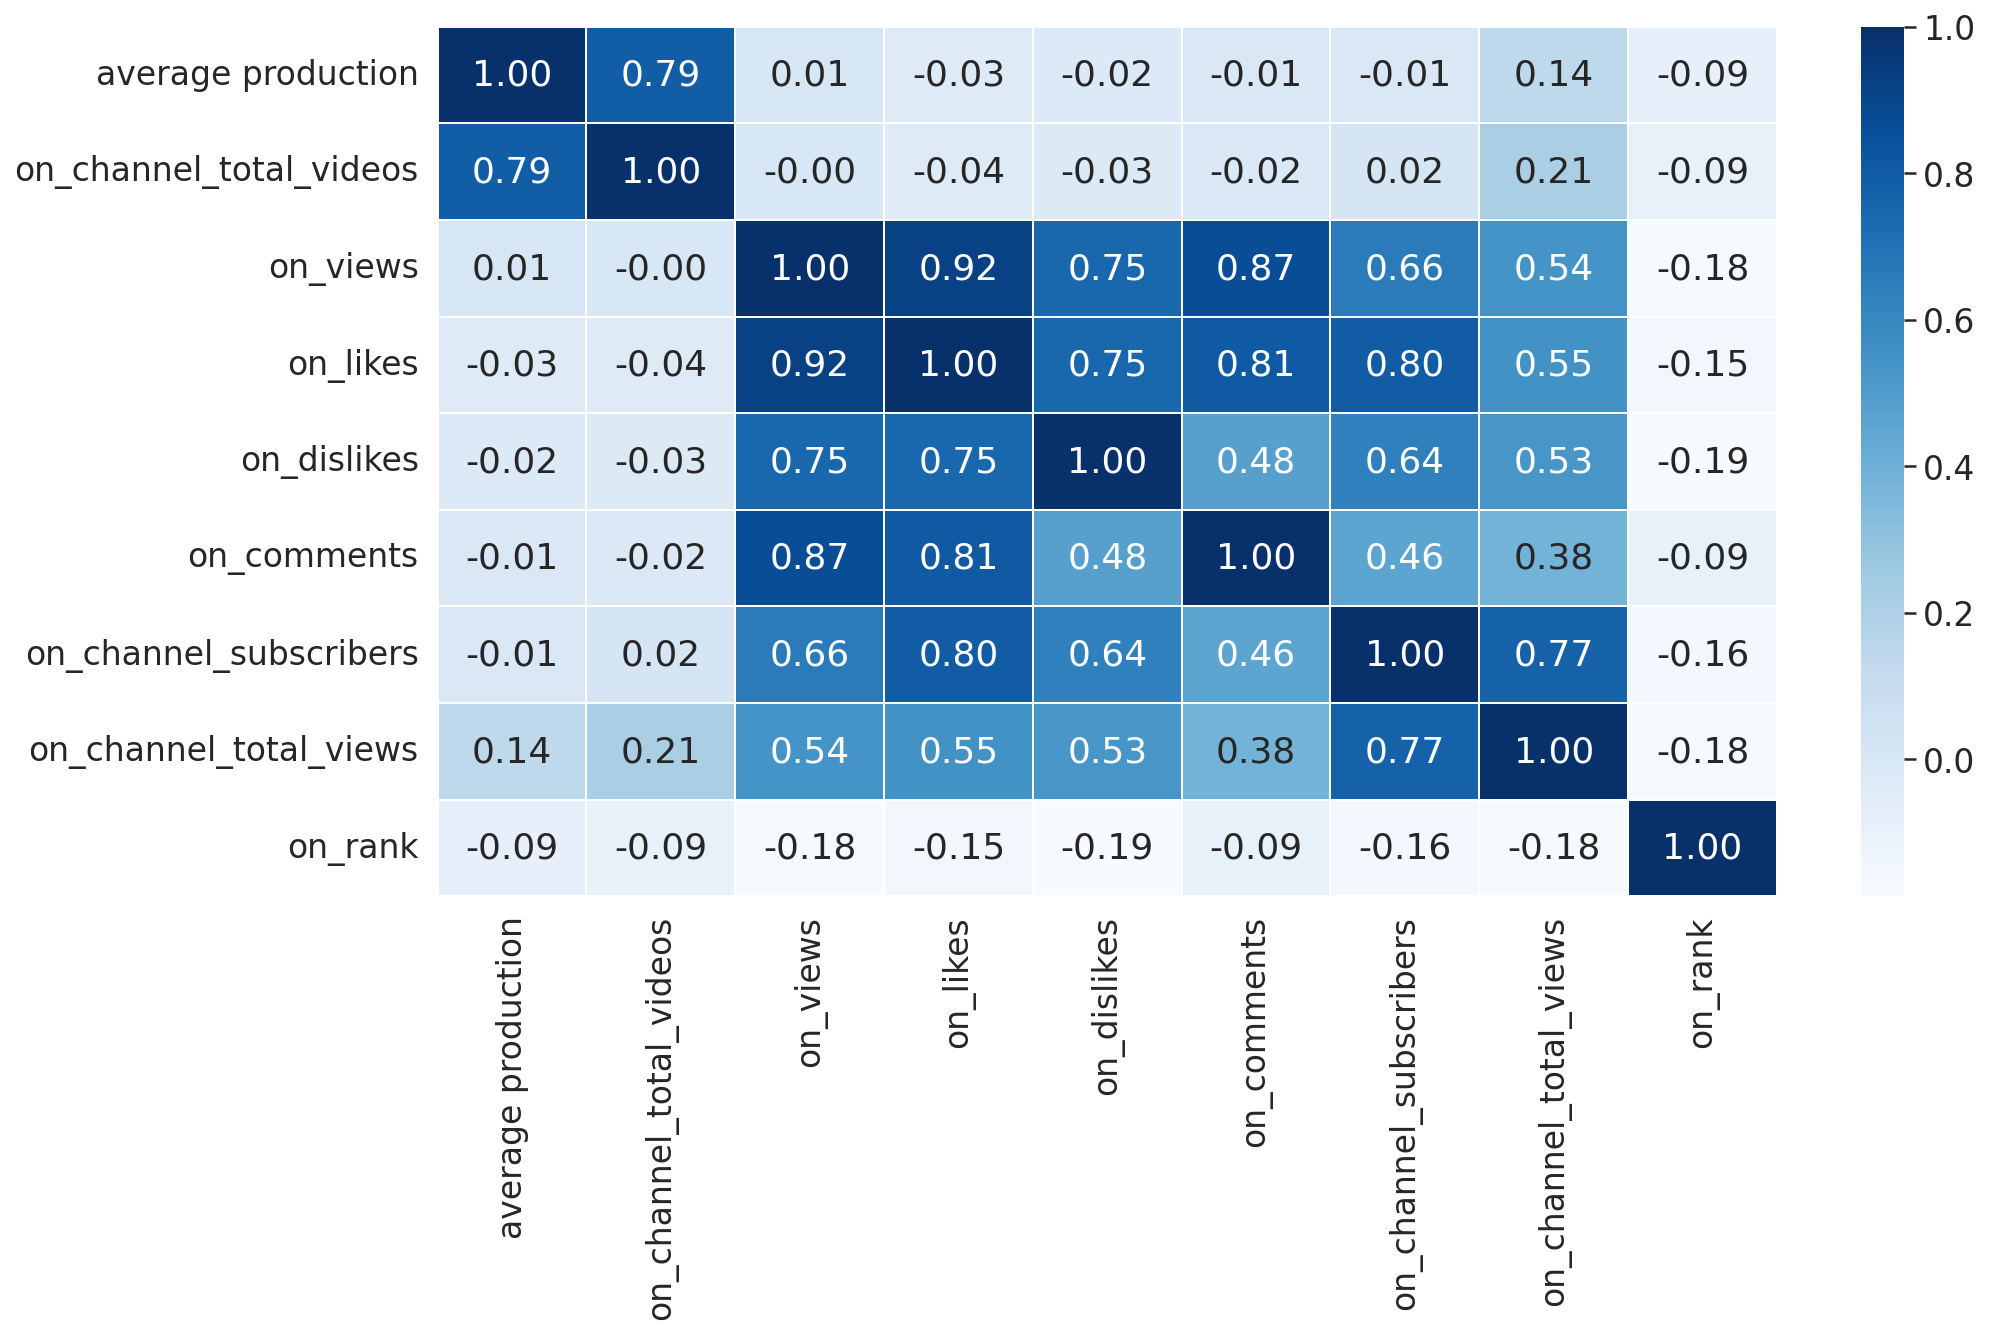

In [ ]:
import seaborn as sns
sns.set(font_scale = 1.5)
sns.heatmap(data = df_result_cov.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

네. 아무런 상관이 없군요.

가설검증 실패.

In [ ]:
Entertainment = engagement(category_df[0]).dropna()
Entertainment['average production'] = Entertainment['average production'].apply(lambda x : round(x, 2))

In [ ]:
Entertainment = Entertainment[['channel_id', 'video_id', 'published_month','category_name',
                      'average production', 'on_channel_total_videos', 'on_views', 'on_likes',
                      'on_dislikes', 'on_comments', 'on_channel_subscribers',
                      'on_channel_total_views', 'on_rank']]

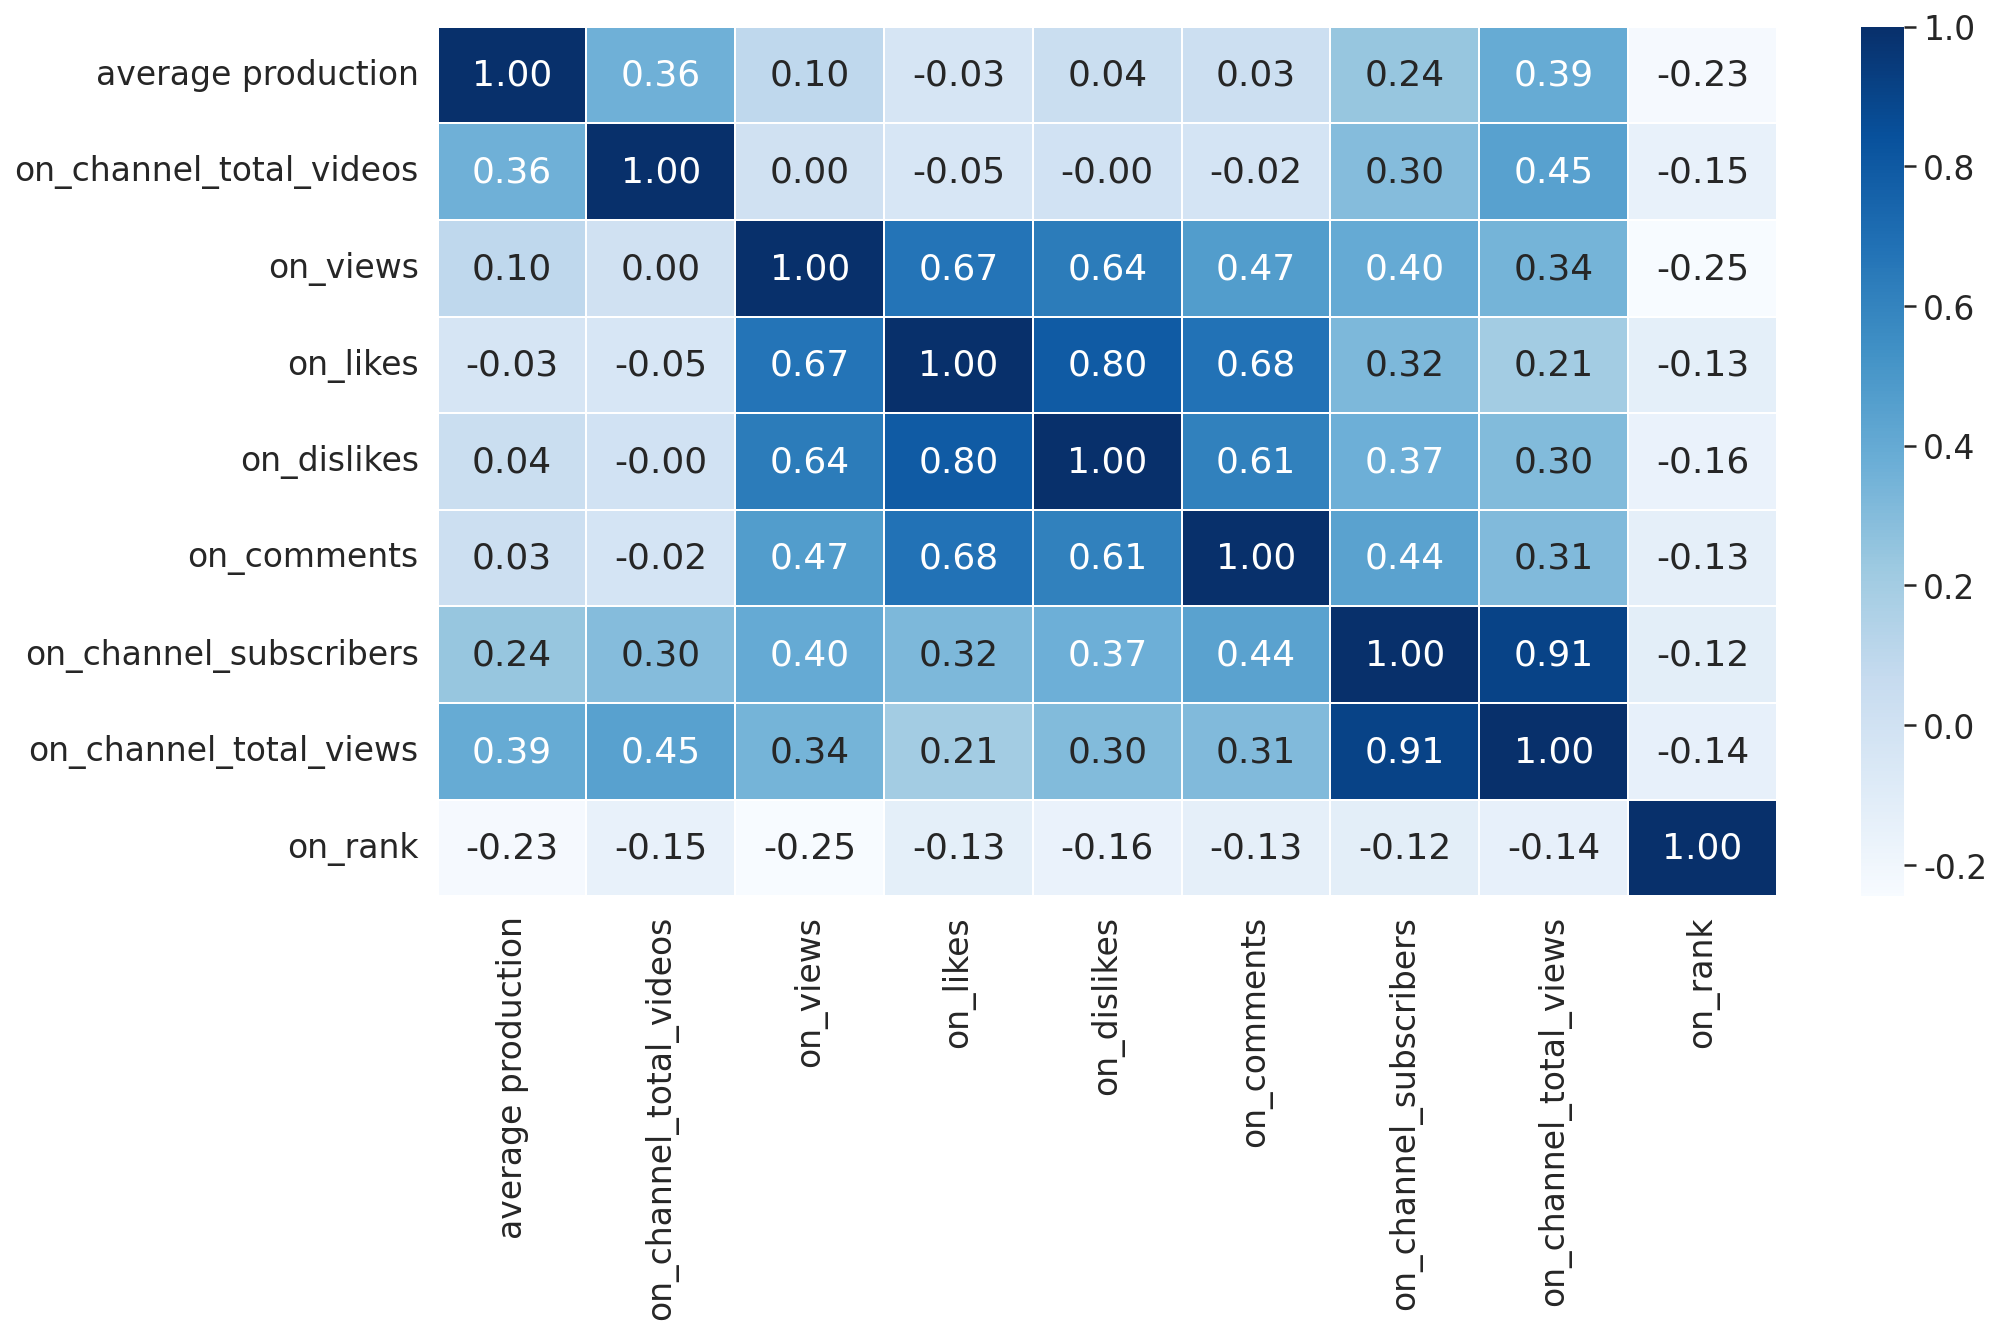

In [ ]:
sns.set(font_scale = 1.5)
sns.heatmap(data = Entertainment.iloc[:,4:].corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues');

카테고리별로 따로 보아도 별 연관성은 없어 보입니다. 

# 인기비디오로 게재되어 있는 시간이 많을 수록 인게이지먼트와의 상관관계가 높을 것이다. 

In [ ]:
df_ing= df[['video_id','on_trending_date','off_trending_date','on_views', 'on_likes', 'on_dislikes','on_comments', 'on_channel_subscribers', 'on_channel_total_views','on_rank']]

In [ ]:
df_ing.head()

,video_id,on_trending_date,off_trending_date,on_views,on_likes,on_dislikes,on_comments,on_channel_subscribers,on_channel_total_views,on_rank
0,V-0db,2021-07-03,2021-07-04,1659484,270004,792,10373,1080000,685992413,13
1,V-1XL,2021-06-26,2021-06-27,293559,7121,121,1083,627000,75327083,28
2,V-4fa,2021-07-19,2021-07-22,451260,3994,162,696,5750000,5424167911,1
3,V-5ip,2021-06-04,2021-06-04,216446,1158,30,416,94200,71160125,18
4,V-5jn,2021-07-08,2021-07-09,631598,3839,112,687,47600,6993451,11


In [ ]:
df_ing['trending_duration'] = df_ing['off_trending_date'] - df_ing['on_trending_date']

In [ ]:
df_ing=df_ing[['video_id','trending_duration','on_views', 'on_likes', 'on_dislikes','on_comments', 'on_channel_subscribers', 'on_channel_total_views','on_rank']]

In [ ]:
df_ing

,video_id,trending_duration,on_views,on_likes,on_dislikes,on_comments,on_channel_subscribers,on_channel_total_views,on_rank
0,V-0db,1 days,1659484,270004,792,10373,1080000,685992413,13
1,V-1XL,1 days,293559,7121,121,1083,627000,75327083,28
2,V-4fa,3 days,451260,3994,162,696,5750000,5424167911,1
3,V-5ip,0 days,216446,1158,30,416,94200,71160125,18
4,V-5jn,1 days,631598,3839,112,687,47600,6993451,11
...,...,...,...,...,...,...,...,...,...
2639,VzwuB,3 days,1137805,3333,22830,19228,1010000,790006060,2
2640,VzxuL,0 days,2097315,40954,558,18125,2920000,1280502681,1
2641,VzygR,0 days,59192,729,46,438,73100,28123608,32
2642,Vzz6W,1 days,102342,3129,67,230,298000,139692013,20


In [ ]:
# 날짜 차이(timedelta)형식 int형으로 바꾸기
df_ing['trending_duration'] = df_ing['trending_duration'].dt.days

In [ ]:
df_ing = df_ing.iloc[:,1:]

상관관계를 분석해 봅니다. 

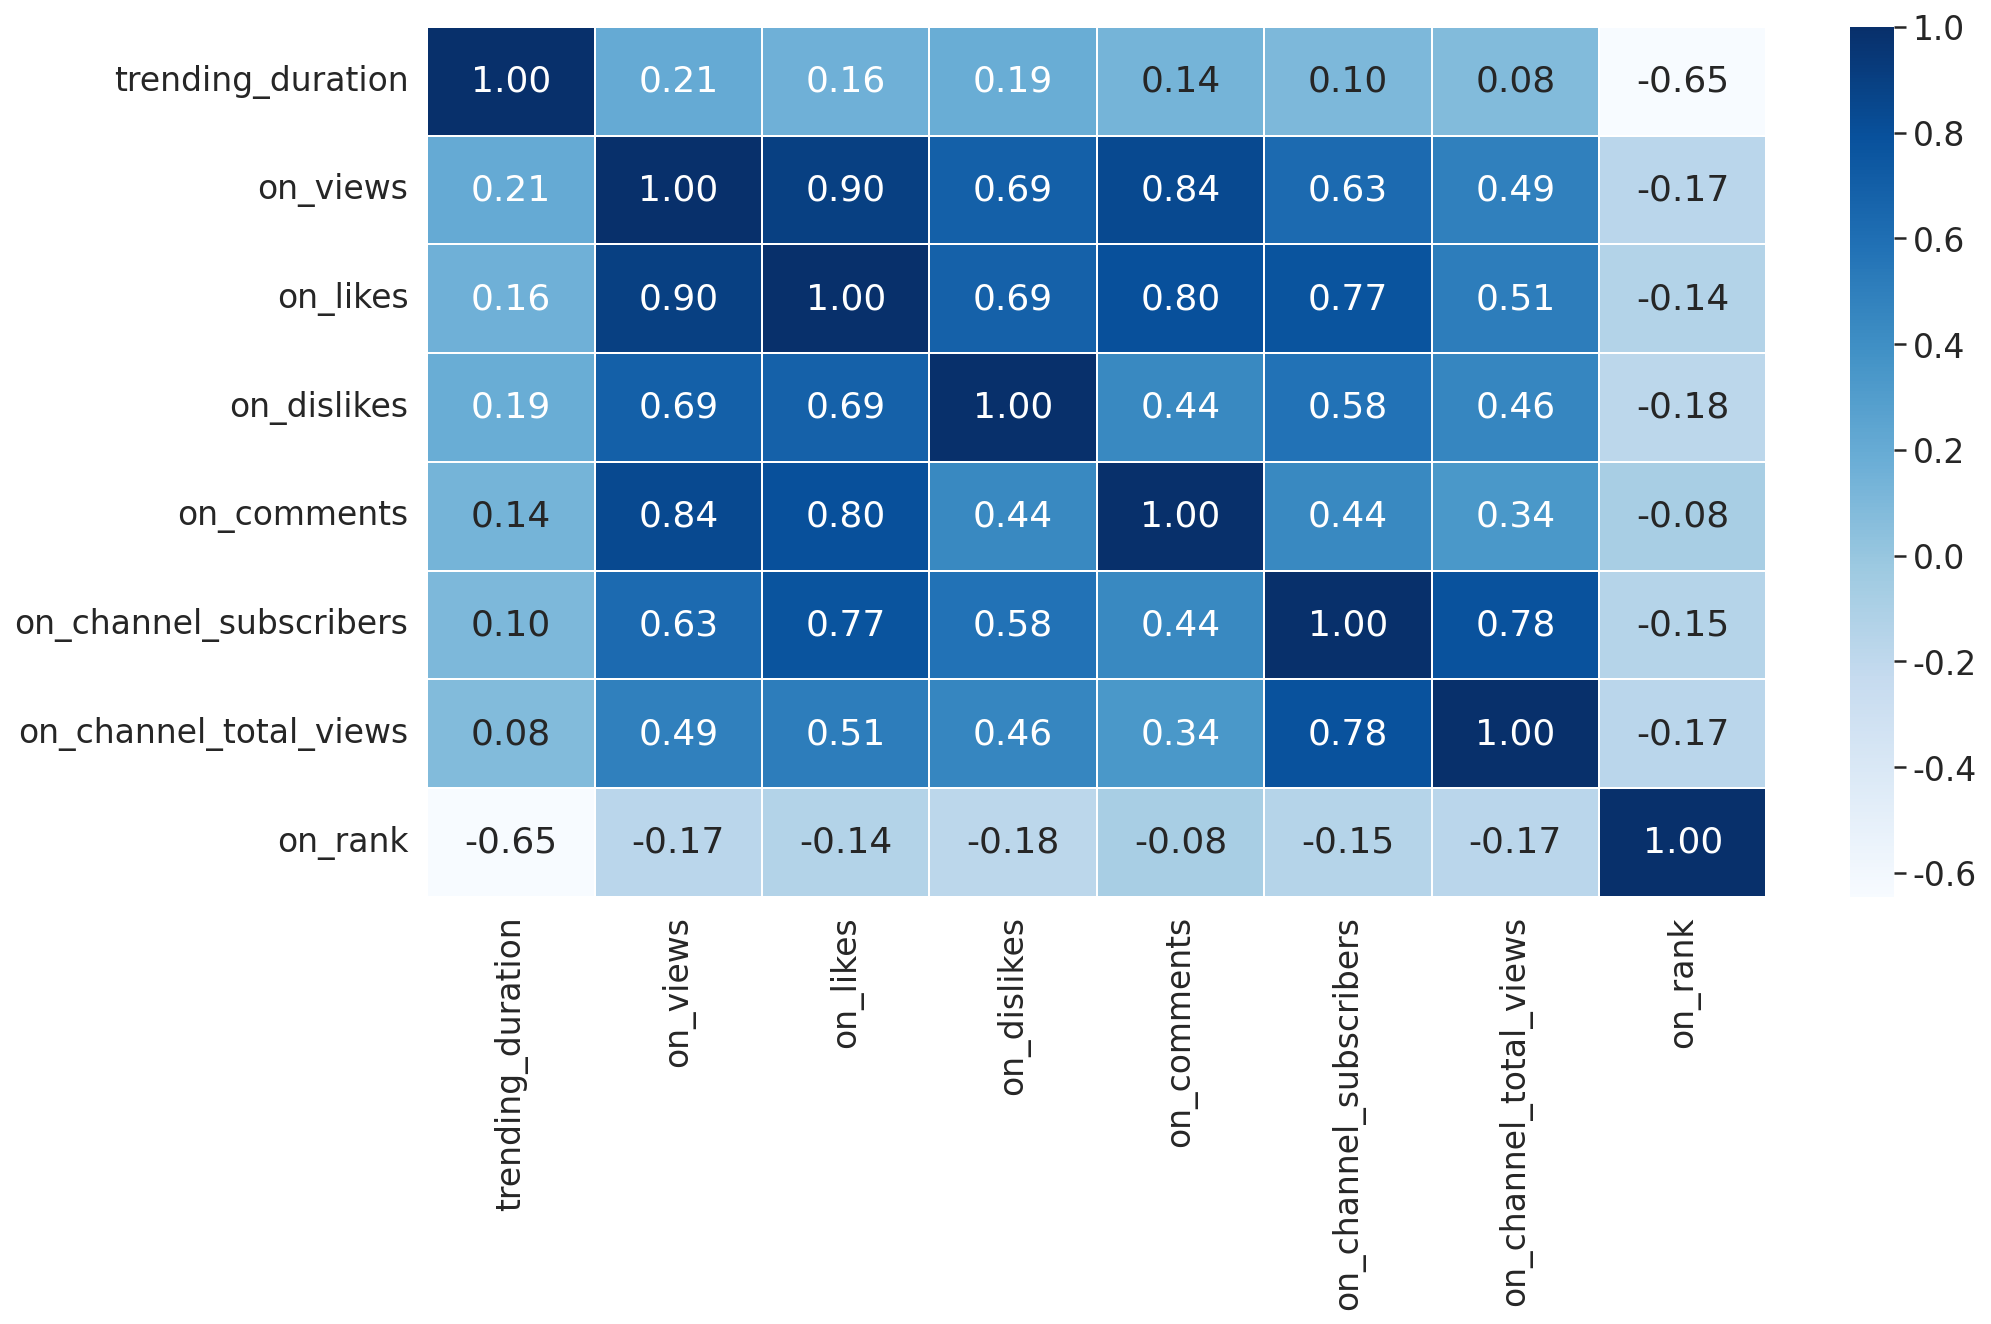

In [ ]:
sns.set(font_scale = 1.5)
sns.heatmap(data = df_ing.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues');

인기비디오로 게재되어 있는 기간과 인게이지먼트와의 상관관계도 특별히 발견되는 바가 없네요.

# 해시태그가 상세할 수록 인게이지먼트와의 연관성이 높을 것이다.(해시태그 개수와의 연관성)

In [ ]:
df_tag= df[['tags','on_views', 'on_likes', 'on_dislikes','on_comments', 'on_channel_subscribers', 'on_channel_total_views','on_rank']]

In [ ]:
# 결측치 제거
df_tag.dropna(inplace=True)

In [ ]:
# 리스트가 들어오면 특수문자 및 공백을 제거한 리스트를 return하는 함수
import re

def text(lis):
  li = []
  for i in lis:
    li.append(re.sub(r"[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》\s]","",i))
  return li

In [ ]:
df_tag['tag_name'] =df_tag['tags'].apply(lambda x: x.split('|'))  # 태그 추출 

# 특수문자 및 공백 제거
df_tag['tag_name']= df_tag['tag_name'].apply(lambda x: text(x))
df_tag.reset_index(drop=True, inplace=True)

In [ ]:
df_tag=df_tag.iloc[:,1:]

In [ ]:
df_tag['tag_count'] = df_tag['tag_name'].apply(lambda x: len(x))

In [ ]:
df_tag.columns

Index(['on_views', 'on_likes', 'on_dislikes', 'on_comments',
       'on_channel_subscribers', 'on_channel_total_views', 'on_rank',
       'tag_name', 'tag_count'],
      dtype='object')

In [ ]:
df_tag = df_tag[['tag_count','on_views', 'on_likes', 'on_dislikes', 'on_comments','on_channel_subscribers', 'on_channel_total_views', 'on_rank']]

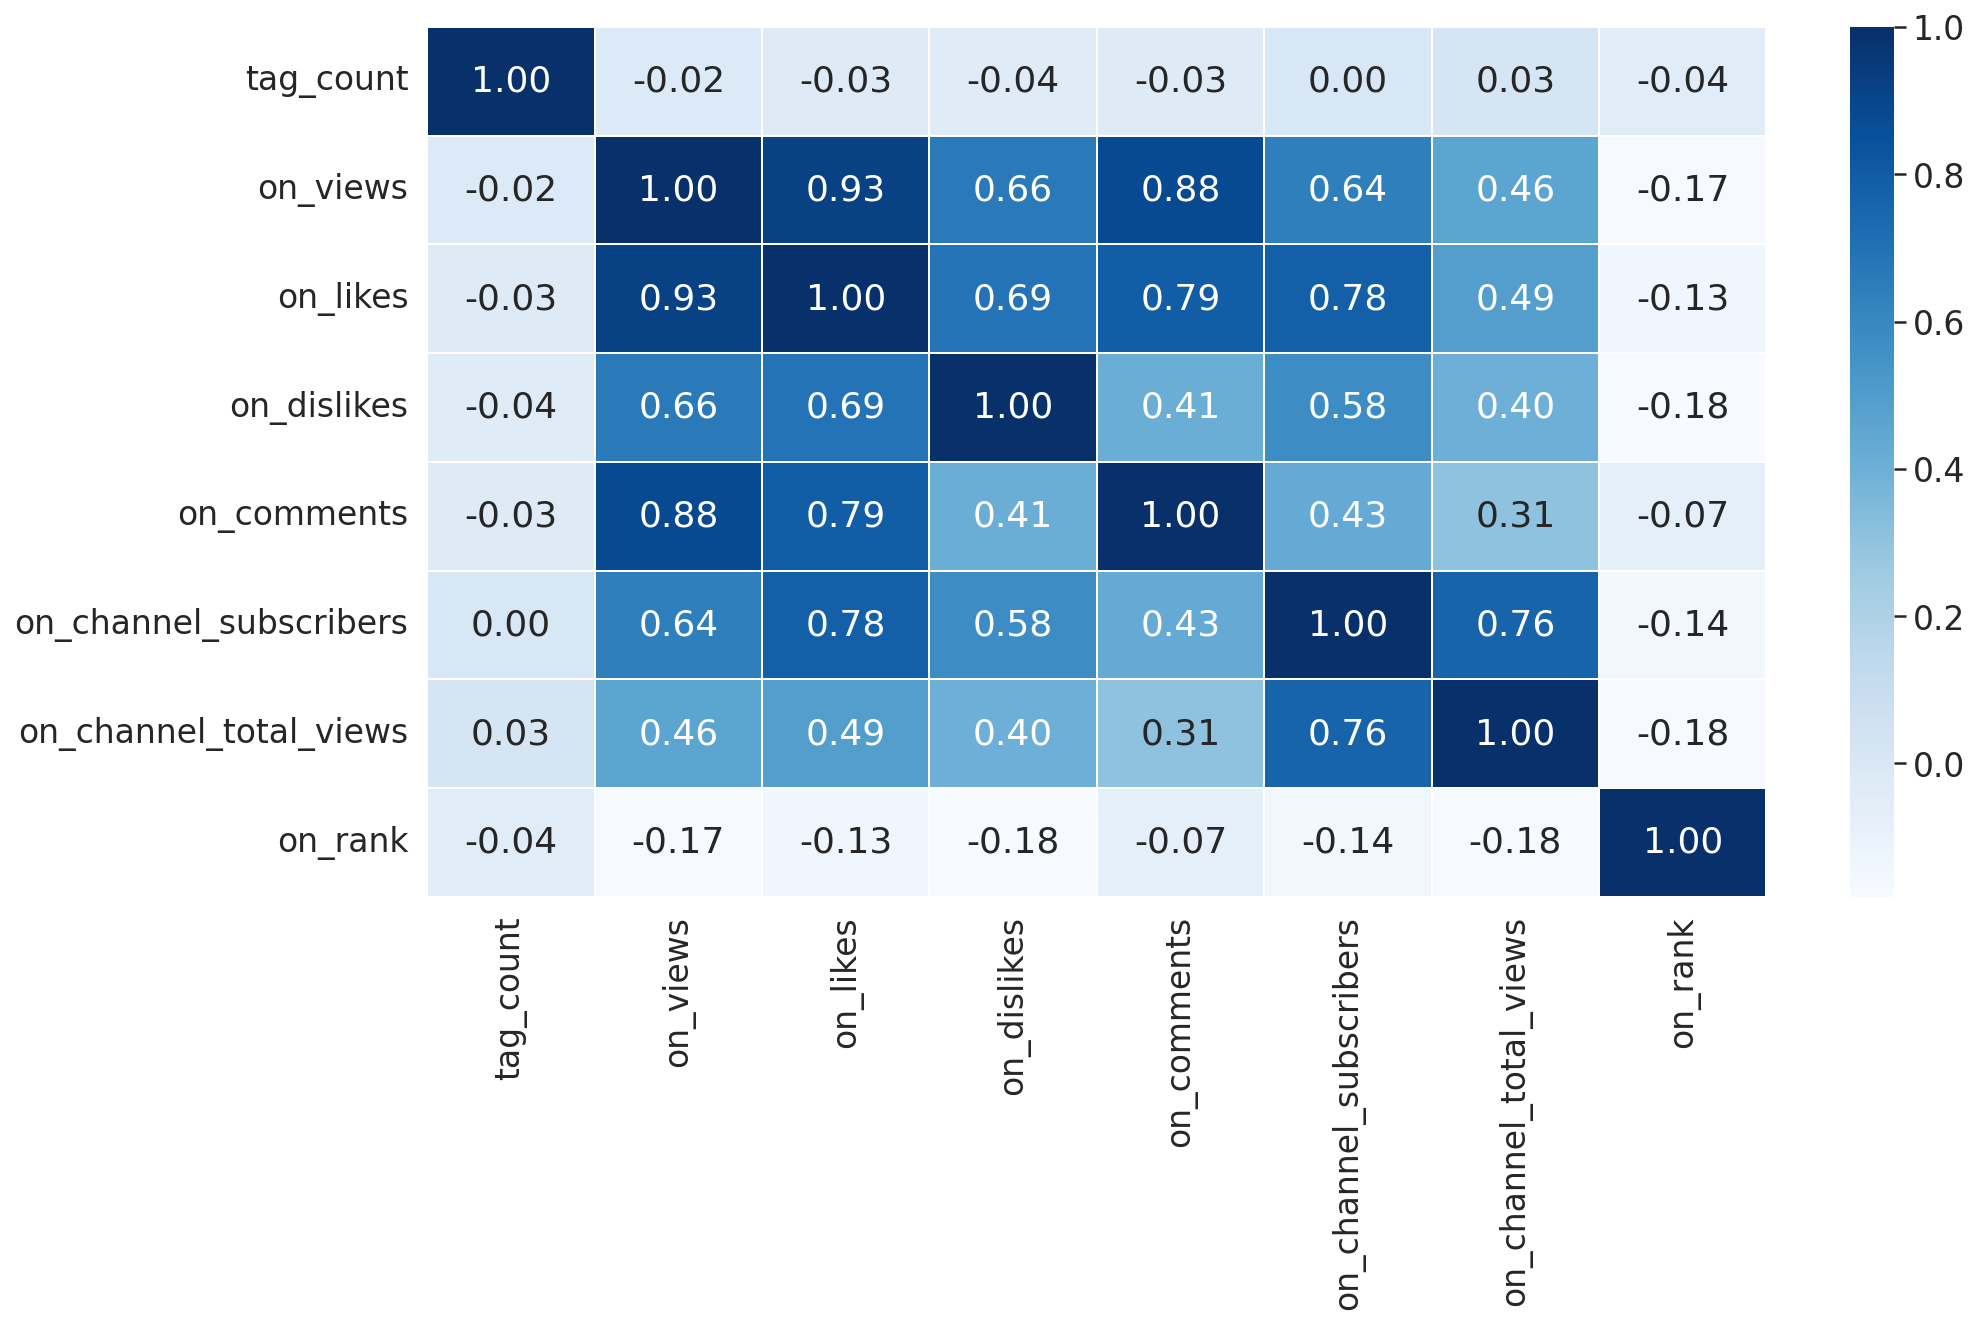

In [ ]:
sns.set(font_scale = 1.5)
sns.heatmap(data = df_tag.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues');

# 영상길이와 인게이지먼트와의 연관성

In [ ]:
df.columns

Index(['video_id', 'channel_id', 'published_date', 'category_name', 'duration',
       'tags', 'description', 'on_trending_date', 'off_trending_date',
       'on_rank', 'off_rank', 'on_views', 'off_views', 'on_likes', 'off_likes',
       'on_dislikes', 'off_dislikes', 'on_comments', 'off_comments',
       'on_channel_subscribers', 'off_channel_subscribers',
       'on_channel_total_views', 'off_channel_total_views',
       'on_channel_total_videos', 'off_channel_total_videos'],
      dtype='object')

In [ ]:
df_dur = df[['duration','on_views', 'on_likes', 'on_dislikes','on_comments', 'on_channel_subscribers', 'on_channel_total_views']]

In [ ]:
df_dur

,duration,on_views,on_likes,on_dislikes,on_comments,on_channel_subscribers,on_channel_total_views
0,PT8M20S,1659484,270004,792,10373,1080000,685992413
1,PT9M17S,293559,7121,121,1083,627000,75327083
2,PT7M39S,451260,3994,162,696,5750000,5424167911
3,PT6M40S,216446,1158,30,416,94200,71160125
4,PT11M27S,631598,3839,112,687,47600,6993451
...,...,...,...,...,...,...,...
2639,PT2M34S,1137805,3333,22830,19228,1010000,790006060
2640,PT6M39S,2097315,40954,558,18125,2920000,1280502681
2641,PT11M45S,59192,729,46,438,73100,28123608
2642,PT11M27S,102342,3129,67,230,298000,139692013


Datetime으로 변경하기 위해 duration컬럼의 문자열을 적절하게 포맷합니다.

In [ ]:
from datetime import timedelta
from datetime import datetime
import time

In [ ]:
# 'H', 'M', 'S' 셋 다 있는 경우
df_durHMS = df_dur[(df_dur['duration'].apply(lambda x: x.find('H') != -1 ))&(df_dur['duration'].apply(lambda x: x.find('M') != -1 ))&(df_dur['duration'].apply(lambda x: x.find('S') != -1 ))]
print(df_durHMS.shape)
df_durHMS['duration'] = df_durHMS['duration'].apply(lambda x: datetime.strptime(x, 'PT%HH%MM%SS').time())

(6, 7)


In [ ]:
# 'H', 'M'만 있는 경우
df_durHM = df_dur[(df_dur['duration'].apply(lambda x: x.find('H') != -1 ))&(df_dur['duration'].apply(lambda x: x.find('M') != -1 ))&(df_dur['duration'].apply(lambda x: x.find('S') == -1 ))]
df_durHM.shape

(0, 7)

In [ ]:
# 'H', 'S'만 있는 경우
df_durHS = df_dur[(df_dur['duration'].apply(lambda x: x.find('H') != -1 ))&(df_dur['duration'].apply(lambda x: x.find('M') == -1 ))&(df_dur['duration'].apply(lambda x: x.find('S') != -1 ))]
print(df_durHS.shape)
df_durHS['duration'] = df_durHS['duration'].apply(lambda x: datetime.strptime(x, 'PT%HH%SS').time())

(1, 7)


In [ ]:
# 'M', 'S'만 있는 경우
df_durMS = df_dur[(df_dur['duration'].apply(lambda x: x.find('H') == -1 ))&(df_dur['duration'].apply(lambda x: x.find('M') != -1 ))&(df_dur['duration'].apply(lambda x: x.find('S') != -1 ))]
print(df_durMS.shape)
df_durMS['duration'] = df_durMS['duration'].apply(lambda x: datetime.strptime(x, 'PT%MM%SS').time())

(2432, 7)


In [ ]:
df_durMS['duration'][0]

datetime.time(0, 8, 20)

In [ ]:
# H만 있는경우
df_durH = df_dur[(df_dur['duration'].apply(lambda x: x.find('H') != -1 ))&(df_dur['duration'].apply(lambda x: x.find('M') == -1 ))&(df_dur['duration'].apply(lambda x: x.find('S') == -1 ))]
df_durH.shape

(0, 7)

In [ ]:
# M만 있는 경우
df_durM = df_dur[(df_dur['duration'].apply(lambda x: x.find('H') == -1 ))&(df_dur['duration'].apply(lambda x: x.find('M') != -1 ))&(df_dur['duration'].apply(lambda x: x.find('S') == -1 ))]
print(df_durM.shape)
df_durM['duration'] = df_durM['duration'].apply(lambda x: datetime.strptime(x, 'PT%MM').time())

(41, 7)


In [ ]:
# S만 있는 경우
df_durS = df_dur[(df_dur['duration'].apply(lambda x: x.find('H') == -1 ))&(df_dur['duration'].apply(lambda x: x.find('M') == -1 ))&(df_dur['duration'].apply(lambda x: x.find('S') != -1 ))]
print(df_durS.shape)
df_durS['duration'] = df_durS['duration'].apply(lambda x: datetime.strptime(x, 'PT%SS').time())

(164, 7)


In [ ]:
df_dur_set = pd.concat([df_durHMS,df_durMS, df_durHS, df_durM,df_durS])

In [ ]:
df_dur_set.dtypes

duration                  object
on_views                   int64
on_likes                   int64
on_dislikes                int64
on_comments                int64
on_channel_subscribers     int64
on_channel_total_views     int64
dtype: object

In [ ]:
today = df_dur_set['duration'][0]
today.minute

8

In [ ]:
datetime.combine(date.min, df_dur_set['duration'][0])

datetime.datetime(1, 1, 1, 0, 8, 20)

In [ ]:
# duration 시간을 총 second로 바꾸기
df_dur_set['dur_second'] = df_dur_set['duration'].apply(lambda x:x.hour*3600 + x.minute*60 + x.second)


In [ ]:
df_dur_set = df_dur_set.sort_index().iloc[:, 1:]

In [ ]:
df_dur_set

,on_views,on_likes,on_dislikes,on_comments,on_channel_subscribers,on_channel_total_views,dur_second
0,1659484,270004,792,10373,1080000,685992413,500
1,293559,7121,121,1083,627000,75327083,557
2,451260,3994,162,696,5750000,5424167911,459
3,216446,1158,30,416,94200,71160125,400
4,631598,3839,112,687,47600,6993451,687
...,...,...,...,...,...,...,...
2639,1137805,3333,22830,19228,1010000,790006060,154
2640,2097315,40954,558,18125,2920000,1280502681,399
2641,59192,729,46,438,73100,28123608,705
2642,102342,3129,67,230,298000,139692013,687


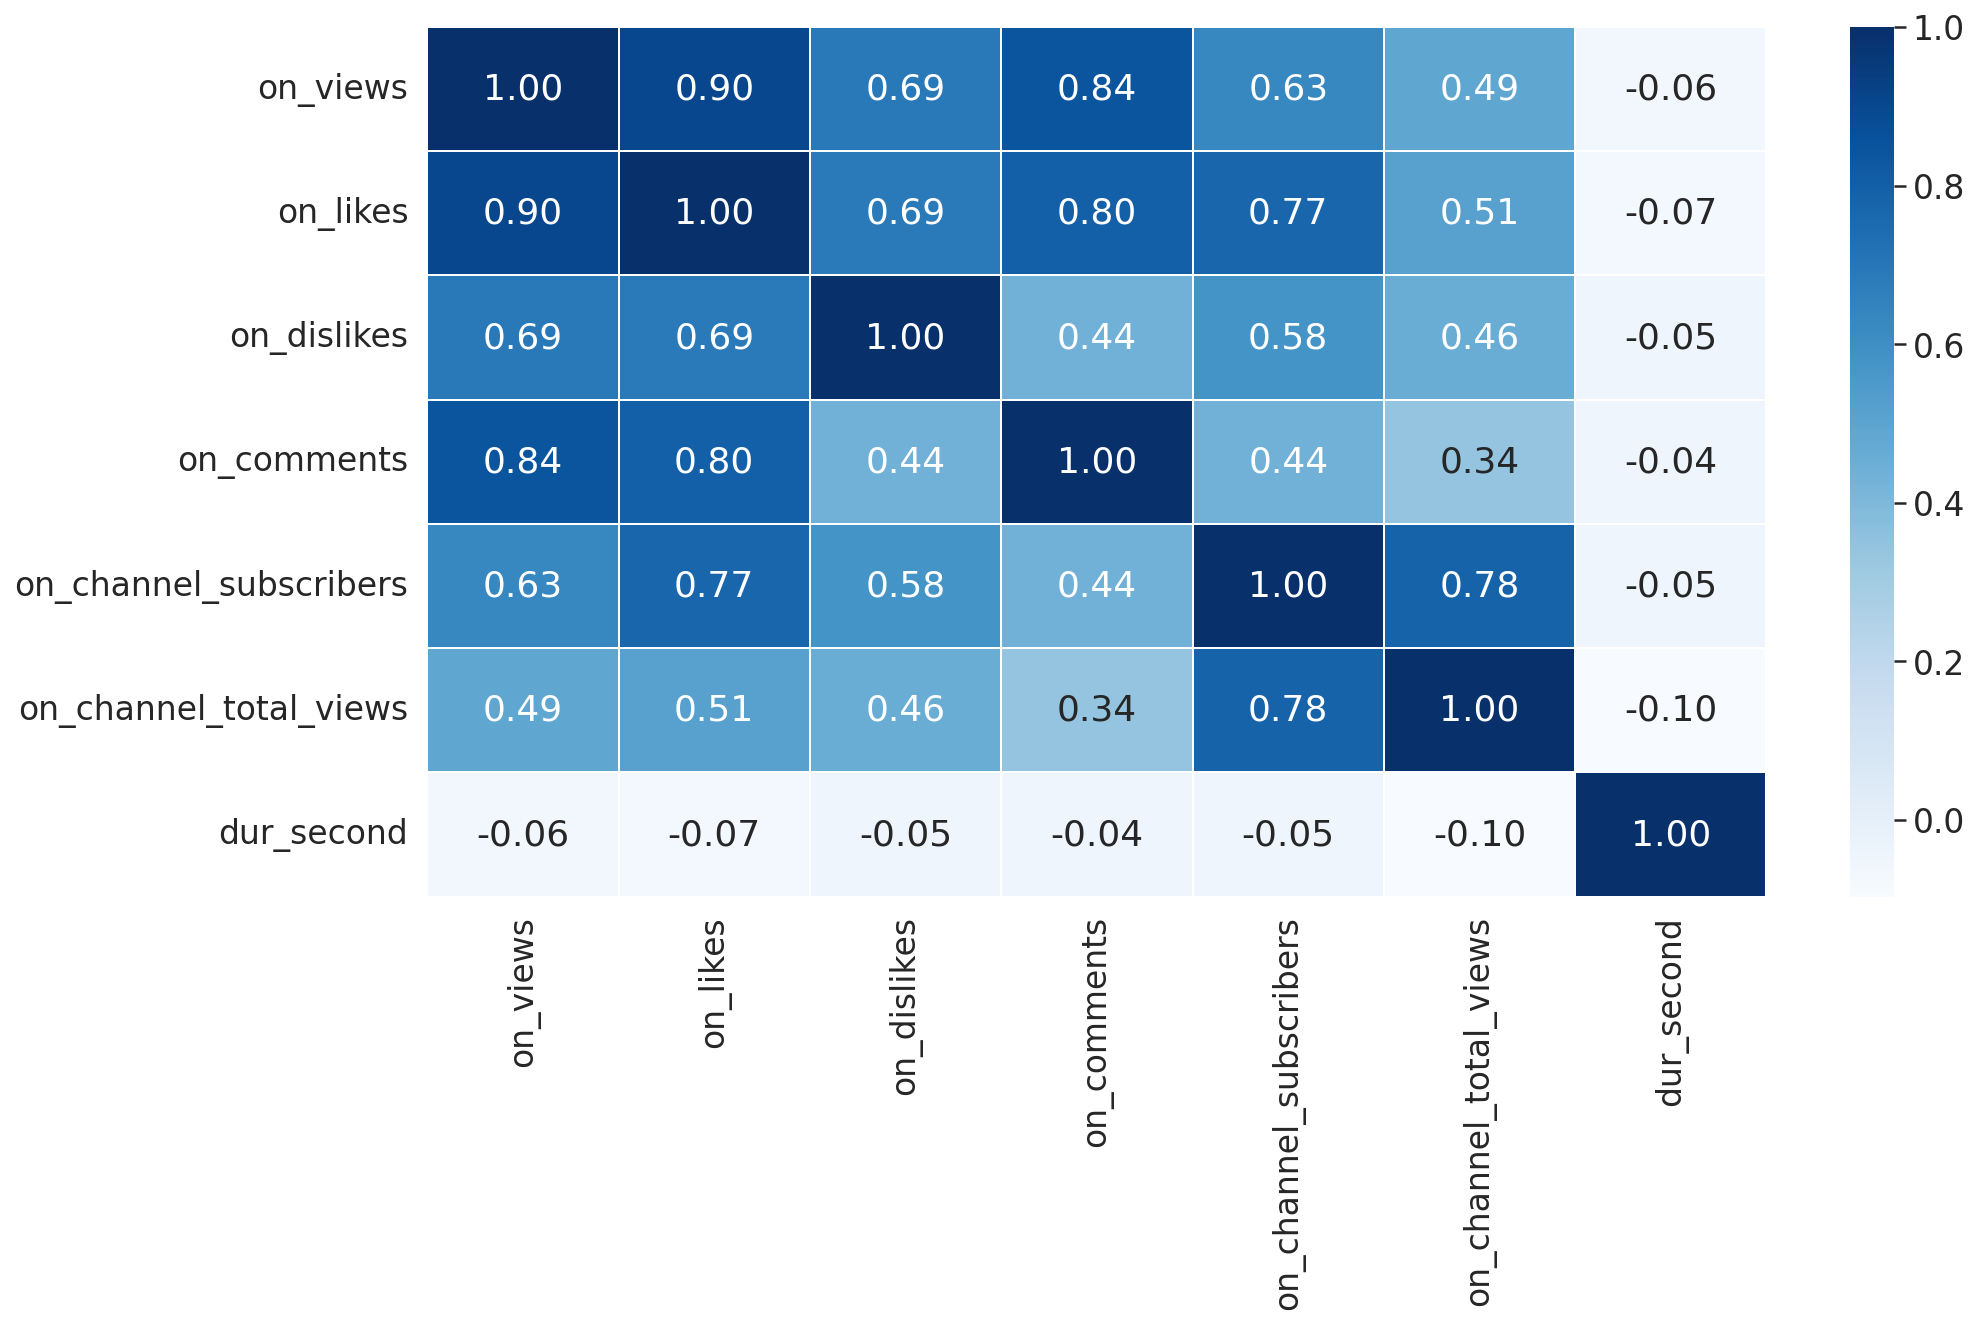

In [ ]:
sns.set(font_scale = 1.5)
sns.heatmap(data = df_dur_set.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues');

# 영상제작일로부터 인기비디오 선정일까지의 기간

In [ ]:
df_date = df[['published_date', 'on_trending_date' ,'on_views', 'on_likes', 'on_dislikes','on_comments', 'on_channel_subscribers', 'on_channel_total_views']]

In [ ]:
df_date['trend_date'] = df_date['on_trending_date']- df_date['published_date']

In [ ]:
df_date

,published_date,on_trending_date,on_views,on_likes,on_dislikes,on_comments,on_channel_subscribers,on_channel_total_views,trend_date
0,2021-07-01,2021-07-03,1659484,270004,792,10373,1080000,685992413,2 days
1,2021-06-24,2021-06-26,293559,7121,121,1083,627000,75327083,2 days
2,2021-07-17,2021-07-19,451260,3994,162,696,5750000,5424167911,2 days
3,2021-06-02,2021-06-04,216446,1158,30,416,94200,71160125,2 days
4,2021-07-06,2021-07-08,631598,3839,112,687,47600,6993451,2 days
...,...,...,...,...,...,...,...,...,...
2639,2021-05-09,2021-05-11,1137805,3333,22830,19228,1010000,790006060,2 days
2640,2021-07-29,2021-07-31,2097315,40954,558,18125,2920000,1280502681,2 days
2641,2021-04-20,2021-04-22,59192,729,46,438,73100,28123608,2 days
2642,2021-04-26,2021-04-28,102342,3129,67,230,298000,139692013,2 days


In [ ]:
# 날짜 차이(timedelta)형식 int형으로 바꾸기
df_date['trend_date'] = df_date['trend_date'].dt.days

In [ ]:
df_date = df_date.iloc[:,2:]

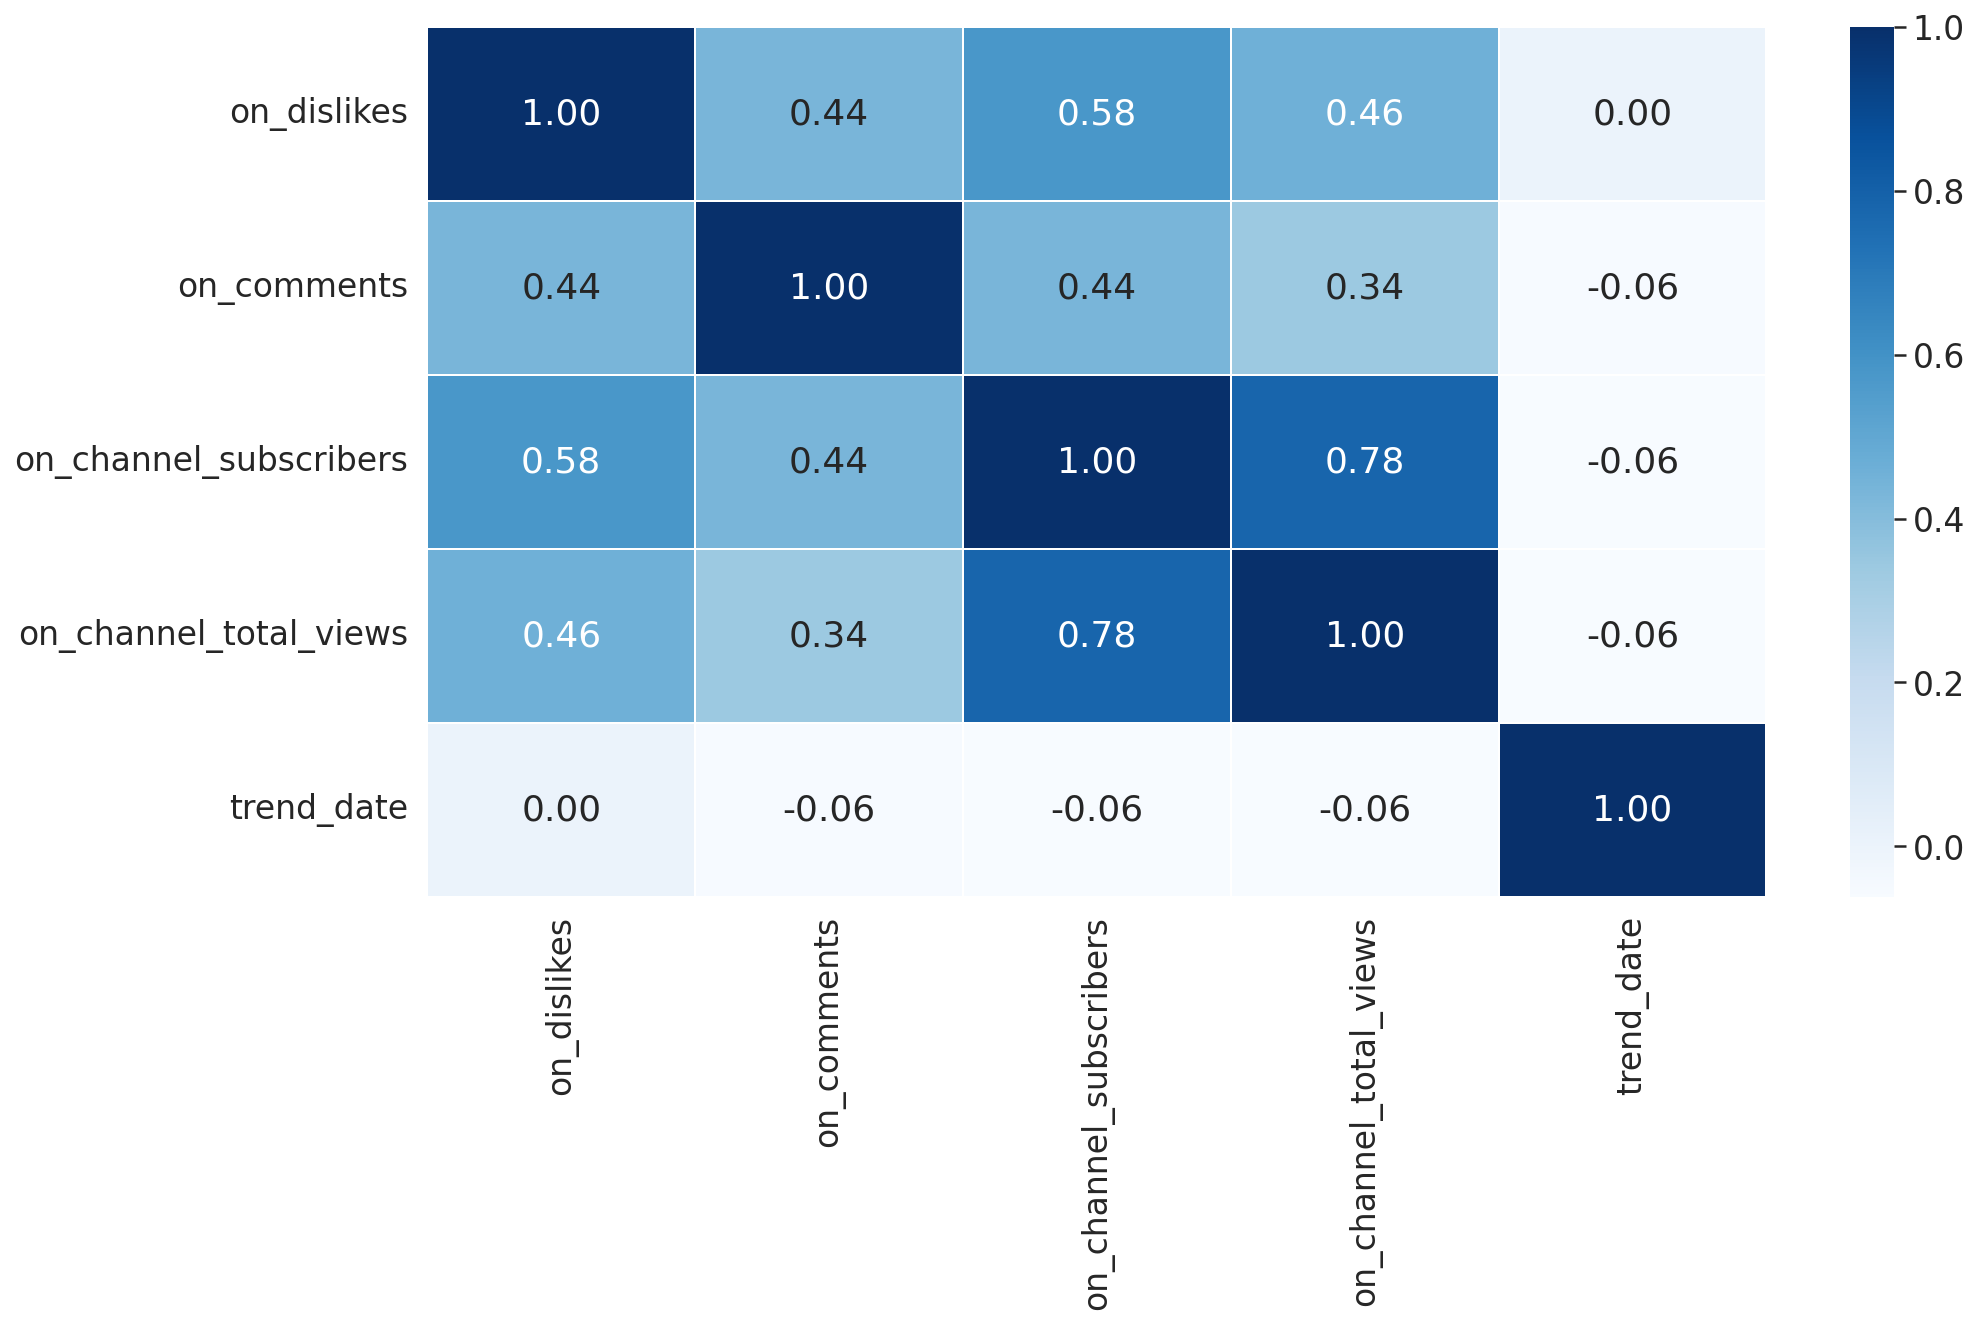

In [ ]:
sns.set(font_scale = 1.5)
sns.heatmap(data = df_date.iloc[:,2:].corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues');

## 문제해석2) 인기비디오를 선정하는 새로운 기준 만들기

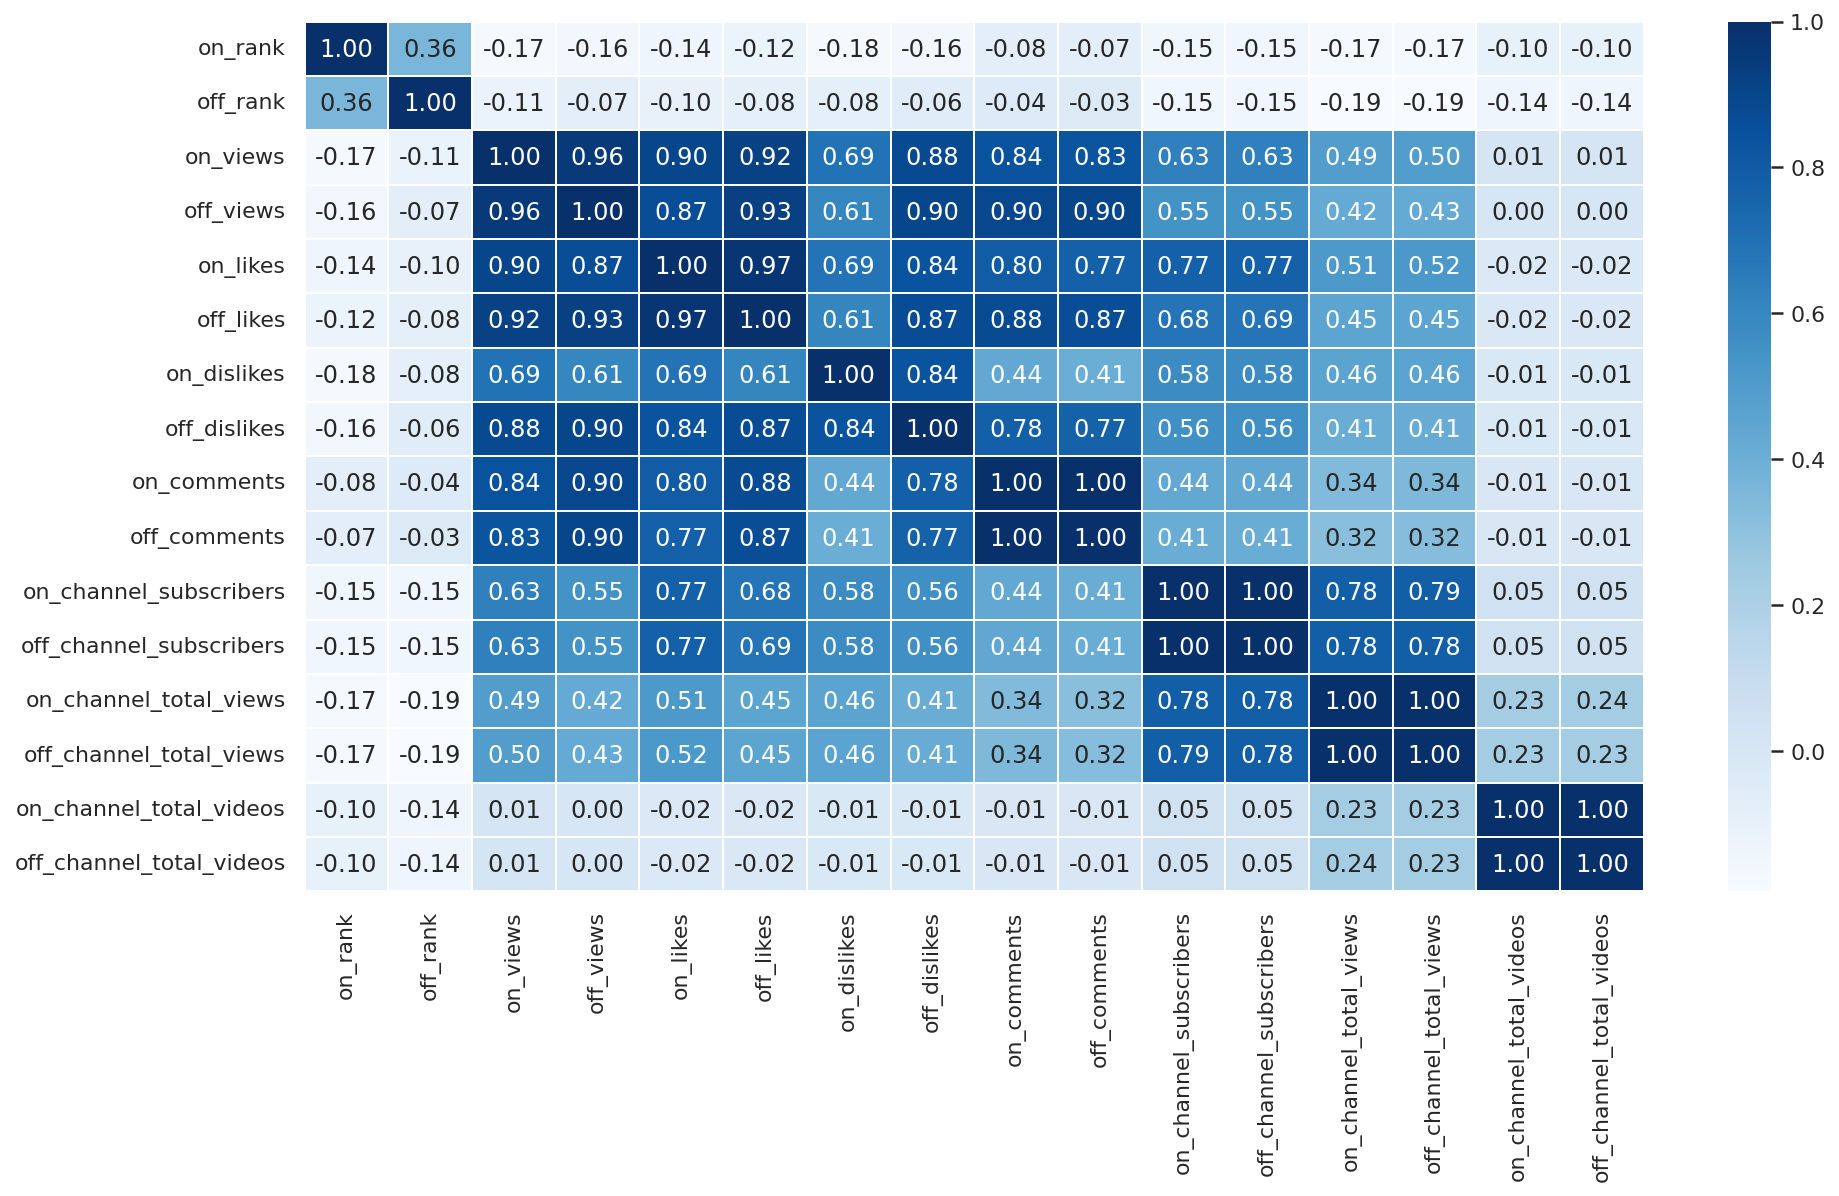

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale = 1)
sns.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues');

- 인기비디오가 된 후 받은 좋아요 수와 싫어요 수의 차이 & 합
- 좋아요 수와 커맨수 수의 합.


In [ ]:
df_lik = df[['on_views', 'on_likes', 'on_dislikes','on_comments', 'on_channel_subscribers', 'on_channel_total_views']]
df_lik['like-dislike'] = df_lik['on_likes'] - df_lik['on_dislikes']
df_lik['like+dislike'] = df_lik['on_likes'] + df_lik['on_dislikes']
df_lik['like+comments'] = df_lik['on_likes'] + df_lik['on_comments']

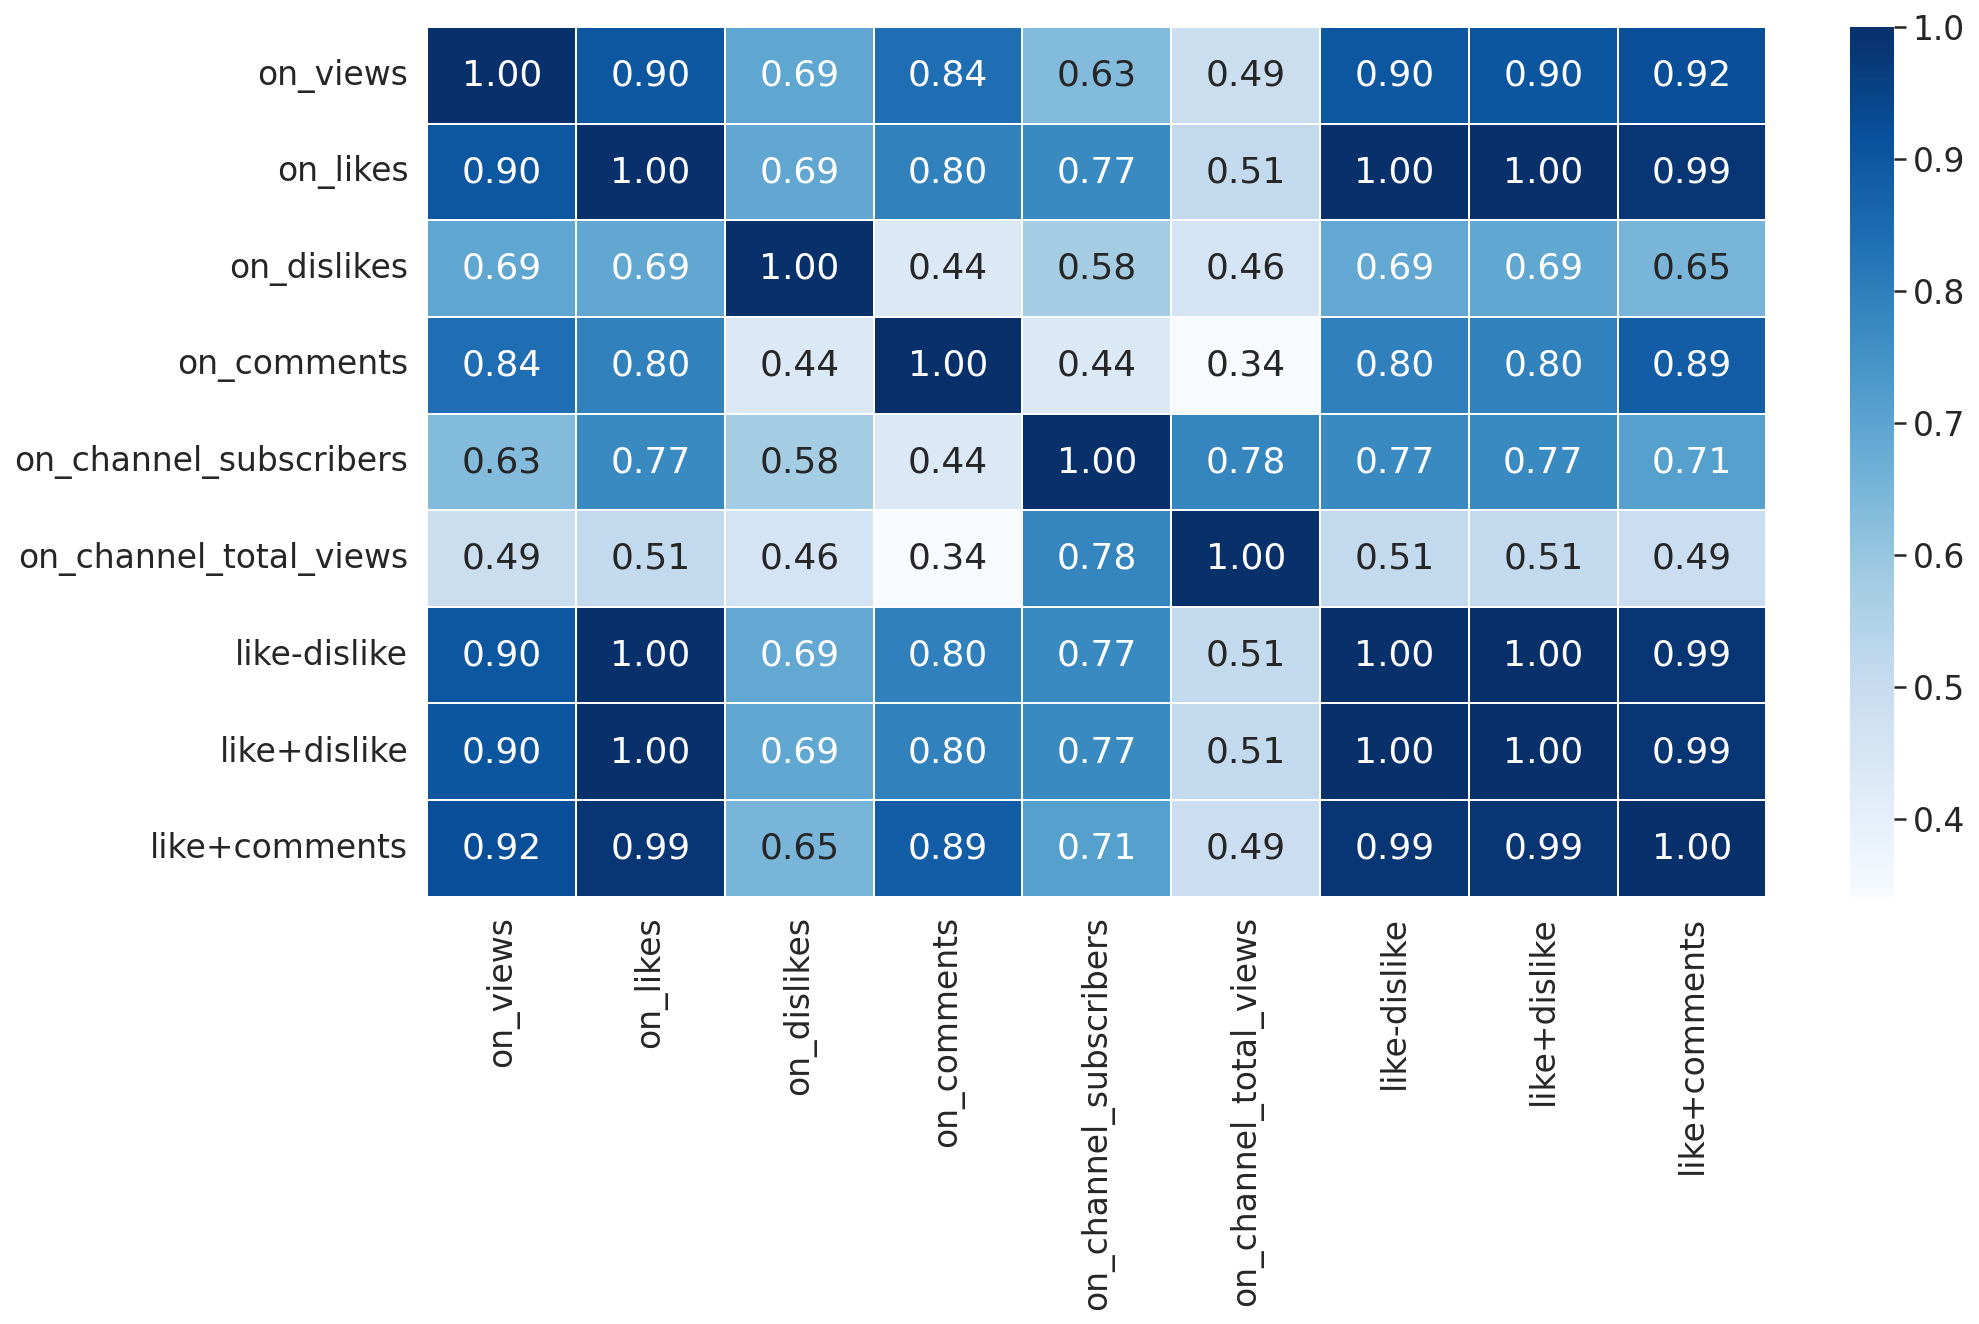

In [ ]:
sns.set(font_scale = 1.5)
p=sns.heatmap(data = df_lik.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues');